# Rain Lambek CS first interview dataset analysis

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Preliminary investigaion and cleaning

In [229]:
data = pd.read_csv("CS_data.csv")
data.head()

,skingoal_healthy,skingoal_glowing,skingoal_clear,skingoal_hydrated,skingoal_protected,skingoal_balanced,skingoal_repaired,skingoal_calm,skingoal_bright,skingoal_rejuvenated,...,age,pregnant,vegan,currentproducts_cleanser,currentproducts_serum,currentproducts_eyecream,currentproducts_dailymoisturizer,currentproducts_spf,currentproducts_nightcream,getmatched
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,age1824,pregnantno,veganno,1,1,1,1,0,1,getmatched_cleanser
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,age1824,pregnantno,veganyes,1,1,0,1,1,0,getmatched_nightcream
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,age1824,pregnantno,veganno,1,1,1,1,0,1,getmatched_nightcream
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,age1824,pregnantno,veganyes,1,1,0,1,1,0,getmatched_dailymoisturizer
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,age1824,pregnantno,veganyes,1,1,0,1,1,0,getmatched_serum


In [230]:
data.mean()

skingoal_healthy                    0.8029
skingoal_glowing                    0.6297
skingoal_clear                      0.7725
skingoal_hydrated                   0.6926
skingoal_protected                  0.0000
skingoal_balanced                   0.0000
skingoal_repaired                   0.0000
skingoal_calm                       0.4829
skingoal_bright                     0.4804
skingoal_rejuvenated                0.0000
skingoal_restored                   0.0000
skinconcern_agingskin               0.5052
skinconcern_acne                    0.5632
skinconcern_dryskin                 0.4139
skinconcern_firmnesselasticity      0.3516
skinconcern_pigmentation            0.4427
skinconcern_sensitivity             0.3632
currentproducts_cleanser            0.8901
currentproducts_serum               0.5645
currentproducts_eyecream            0.3895
currentproducts_dailymoisturizer    0.8324
currentproducts_spf                 0.5236
currentproducts_nightcream          0.4272
dtype: floa

Looks like there are some columns that have no data. They must have been newly added or the data went missing somehow. Just from this it looks like acne is the biggest concern, healthy and clear skin are the biggest goals, and people probably buy cleanser and daily moisturizer to deal with concerns + reach goals.

In [231]:
cdata = data.dropna(how='all') #remove the nan cells if there are any
cdata.head()

,skingoal_healthy,skingoal_glowing,skingoal_clear,skingoal_hydrated,skingoal_protected,skingoal_balanced,skingoal_repaired,skingoal_calm,skingoal_bright,skingoal_rejuvenated,...,age,pregnant,vegan,currentproducts_cleanser,currentproducts_serum,currentproducts_eyecream,currentproducts_dailymoisturizer,currentproducts_spf,currentproducts_nightcream,getmatched
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,age1824,pregnantno,veganno,1,1,1,1,0,1,getmatched_cleanser
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,age1824,pregnantno,veganyes,1,1,0,1,1,0,getmatched_nightcream
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,age1824,pregnantno,veganno,1,1,1,1,0,1,getmatched_nightcream
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,age1824,pregnantno,veganyes,1,1,0,1,1,0,getmatched_dailymoisturizer
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,age1824,pregnantno,veganyes,1,1,0,1,1,0,getmatched_serum


In [232]:

print(cdata['age'].head())
print(type(cdata['age'][0]))
# need to change age column so I can use it as a numerical value if desired later on

0    age1824
1    age1824
2    age1824
3    age1824
4    age1824
Name: age, dtype: object
<class 'str'>


In [233]:
def get_age(age):
    if type(age) == str:
        a = age.split('e')[1]
        a = (int(a[0:2])+int(a[2:4]))/2
        return a
    else:
        pass
        #print(age)
cdata['age'] = cdata['age'].apply(lambda x: get_age(x))
cdata.head(10)

,skingoal_healthy,skingoal_glowing,skingoal_clear,skingoal_hydrated,skingoal_protected,skingoal_balanced,skingoal_repaired,skingoal_calm,skingoal_bright,skingoal_rejuvenated,...,age,pregnant,vegan,currentproducts_cleanser,currentproducts_serum,currentproducts_eyecream,currentproducts_dailymoisturizer,currentproducts_spf,currentproducts_nightcream,getmatched
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,21.0,pregnantno,veganno,1,1,1,1,0,1,getmatched_cleanser
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,1,1,0,getmatched_nightcream
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,21.0,pregnantno,veganno,1,1,1,1,0,1,getmatched_nightcream
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,1,1,0,getmatched_dailymoisturizer
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,1,1,0,getmatched_serum
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,21.0,pregnantno,veganno,1,1,1,1,0,1,getmatched_dailymoisturizer
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,1,1,0,getmatched_cleanser
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,0,1,1,getmatched_eyecream
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,0,1,1,getmatched_serum
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,21.0,pregnantno,veganyes,1,1,0,0,1,1,getmatched_cleanser


# Part 2: Age, gender, and ethnicity distributions

In [99]:
cdata['age'].value_counts()

21.0    3048
29.5    2798
39.5    2016
49.5    1501
59.5     149
82.0      18
Name: age, dtype: int64

In [100]:
cdata['age'].mean()

32.61511017838405

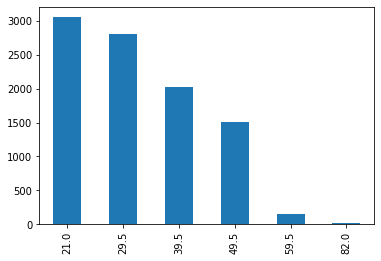

In [101]:
cdata.age.value_counts().plot(kind = 'bar')

Looks kind of like an Exponential distribution. As age increases the counts drop fast. The majority of the customers are ages 18-44 with the mean being somewhere around 33 (can't get exact since age is submitted as a range)

In [102]:
print(cdata['gender'].value_counts())

genderfemale       9418
gendermale          104
gendernonbinary      91
Name: gender, dtype: int64


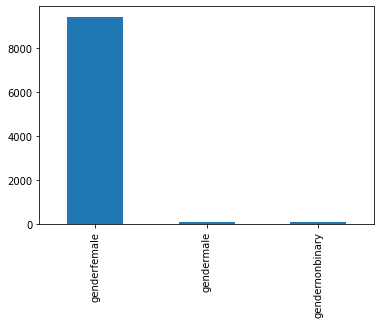

In [103]:
cdata.gender.value_counts().plot(kind = 'bar')

Not surprising here. Almost all of the customers are women, and there are almost more non-binary customers than men despite the fact that non-binary people consist of around 0.2% of the population! The low amount of masculine customers is certainly a possible target for future customers.

In [234]:
def get_eth(eth):
    if type(eth) == str:
        a = eth.split('y')[1]
        return a
    else:
        pass
        #print(eth)
cdata['ethnicity'] = cdata['ethnicity'].apply(lambda x: get_eth(x))
cdata['ethnicity'].head(10)

0          caucasian
1    africanamerican
2          caucasian
3    africanamerican
4    africanamerican
5          caucasian
6    africanamerican
7          caucasian
8          caucasian
9          caucasian
Name: ethnicity, dtype: object

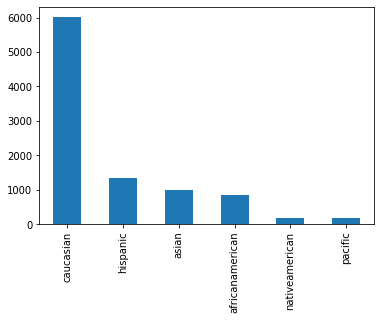

In [106]:
cdata.ethnicity.value_counts().plot(kind = 'bar')

Mostly caucasin, as expected. Hispanic population is a little bit below the 18.5% US average, Asian is a good amount above the US average so that market might be saturated, and everything else is as expected

# Part 3: Are skin goals correlated to skin concerns

In [110]:
cdata["skingoal_rejuvenated"].corr(cdata["skingoal_rejuvenated"])

nan

In [117]:
# check if there is some bad data that could be causing the nan
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(cdata["skingoal_rejuvenated"])

True

In [123]:
# check variance to see if we are dividing by 0, and we sure are!
cdata["skingoal_rejuvenated"].var()

0.0

In [126]:
cdata.corr()

,skingoal_healthy,skingoal_glowing,skingoal_clear,skingoal_hydrated,skingoal_protected,skingoal_balanced,skingoal_repaired,skingoal_calm,skingoal_bright,skingoal_rejuvenated,...,skinconcern_firmnesselasticity,skinconcern_pigmentation,skinconcern_sensitivity,age,currentproducts_cleanser,currentproducts_serum,currentproducts_eyecream,currentproducts_dailymoisturizer,currentproducts_spf,currentproducts_nightcream
skingoal_healthy,1.000000,0.122407,0.171254,0.152060,NaN,NaN,NaN,0.163388,0.148360,NaN,...,0.080553,0.009900,0.057427,-0.000487,0.096758,0.018571,0.046758,0.083898,0.050339,0.052347
skingoal_glowing,0.122407,1.000000,0.062029,0.250750,NaN,NaN,NaN,0.037786,0.353118,NaN,...,0.134876,0.058502,-0.061607,0.011253,0.062266,0.100384,0.115648,0.089474,0.067541,0.074066
skingoal_clear,0.171254,0.062029,1.000000,0.027226,NaN,NaN,NaN,0.200298,0.071096,NaN,...,-0.210383,0.062020,0.091404,-0.354481,0.124300,-0.014319,-0.102182,0.056654,0.011076,-0.072390
skingoal_hydrated,0.152060,0.250750,0.027226,1.000000,NaN,NaN,NaN,0.174537,0.249316,NaN,...,0.118840,-0.064201,0.043927,0.057895,0.074259,0.056068,0.097031,0.129855,0.075307,0.094726
skingoal_protected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skingoal_balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skingoal_repaired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skingoal_calm,0.163388,0.037786,0.200298,0.174537,NaN,NaN,NaN,1.000000,0.210745,NaN,...,-0.062397,-0.002336,0.253040,-0.006918,0.085550,0.051674,0.034925,0.061796,0.035475,0.064748
skingoal_bright,0.148360,0.353118,0.071096,0.249316,NaN,NaN,NaN,0.210745,1.000000,NaN,...,0.145425,0.145175,-0.075668,0.082824,0.058210,0.134483,0.142774,0.081533,0.088016,0.099428
skingoal_rejuvenated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Acne/clear and dryskin/hydrated seem to be correalted, as expected, but there isn't any other probable correlation


# Part 4: Skin concerns by age

For question 3 I need to group by unique age (group), and look at the counts and mean of each concern. For question 4 the process is he same except with ethnicity instead of age.

In [153]:
aggData = cdata.groupby('age')
aggData = aggData.agg(['sum','mean'])
aggData.head()

skingoal_healthy           skingoal_glowing           skingoal_clear  \
                  sum      mean              sum      mean            sum   
age                                                                         
21.0           2455.0  0.805446           1993.0  0.653871         2826.0   
29.5           2299.0  0.821658           1680.0  0.600429         2363.0   
39.5           1683.0  0.834821           1319.0  0.654266         1392.0   
49.5           1189.0  0.792139            990.0  0.659560          786.0   
59.5            121.0  0.812081            104.0  0.697987           74.0   

               skingoal_hydrated           skingoal_protected       ...  \
          mean               sum      mean                sum mean  ...   
age                                                                 ...   
21.0  0.927165            2064.0  0.677165                0.0  0.0  ...   
29.5  0.844532            1962.0  0.701215                0.0  0.0  ...   
39.5  0.690476            1379.0  0.684028                0.0  0.0  ...   
49.5  0.523651            1162.0  0.774151                0.0  0.0  ...   
59.5  0.496644             110.0  0.738255                0.0  0.0  ...   

     currentproducts_serum           currentproducts_eyecream            \
                       sum      mean                      sum      mean   
age                                                                       
21.0                  1458  0.478346                      665  0.218176   
29.5                  1750  0.625447                     1131  0.404217   
39.5                  1332  0.660714                     1069  0.530258   
49.5                   991  0.660227                      945  0.629580   
59.5                    96  0.644295                       74  0.496644   

     currentproducts_dailymoisturizer           currentproducts_spf            \
                                  sum      mean                 sum      mean   
age                                                                             
21.0                             2628  0.862205                1563  0.512795   
29.5                             2485  0.888134                1621  0.579342   
39.5                             1720  0.853175                1133  0.562004   
49.5                             1325  0.882745                 836  0.556962   
59.5                              133  0.892617                  62  0.416107   

     currentproducts_nightcream            
                            sum      mean  
age                                        
21.0                        824  0.270341  
29.5                       1358  0.485347  
39.5                       1037  0.514385  
49.5                        949  0.632245  
59.5                         89  0.597315  

[5 rows x 46 columns]

In [154]:
aggData.iloc[:,22:34]

skinconcern_agingskin           skinconcern_acne            \
                       sum      mean              sum      mean   
age                                                               
21.0                 489.0  0.160433           2459.0  0.806759   
29.5                1447.0  0.517155           1764.0  0.630450   
39.5                1588.0  0.787698            845.0  0.419147   
49.5                1298.0  0.864757            314.0  0.209194   
59.5                 133.0  0.892617             35.0  0.234899   
82.0                  15.0  0.833333              2.0  0.111111   

     skinconcern_dryskin           skinconcern_firmnesselasticity            \
                     sum      mean                            sum      mean   
age                                                                           
21.0              1505.0  0.493766                          499.0  0.163714   
29.5              1189.0  0.424946                          830.0  0.296640   
39.5               709.0  0.351687                          982.0  0.487103   
49.5               541.0  0.360426                         1005.0  0.669554   
59.5                50.0  0.335570                          101.0  0.677852   
82.0                 4.0  0.222222                           14.0  0.777778   

     skinconcern_pigmentation           skinconcern_sensitivity            
                          sum      mean                     sum      mean  
age                                                                        
21.0                   1466.0  0.480971                  1394.0  0.457349  
29.5                   1328.0  0.474625                  1074.0  0.383846  
39.5                    842.0  0.417659                   614.0  0.304563  
49.5                    618.0  0.411726                   397.0  0.264490  
59.5                     57.0  0.382550                    30.0  0.201342  
82.0                      8.0  0.444444                     4.0  0.222222

In [213]:
aggData = cdata.groupby('age')
aggData = aggData.agg(['mean'])

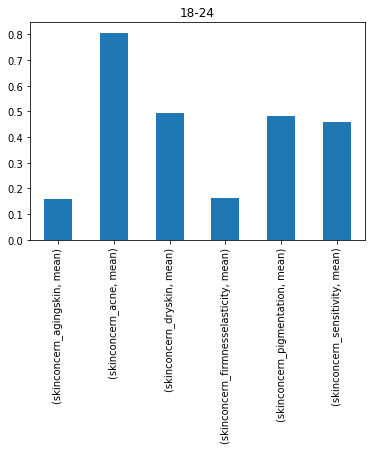

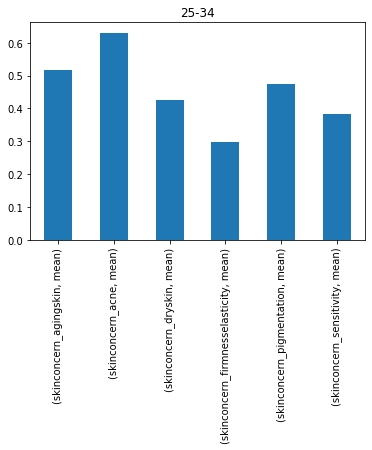

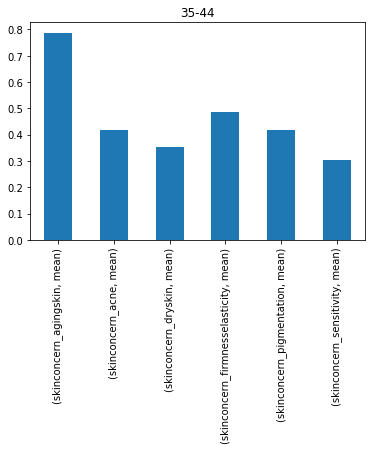

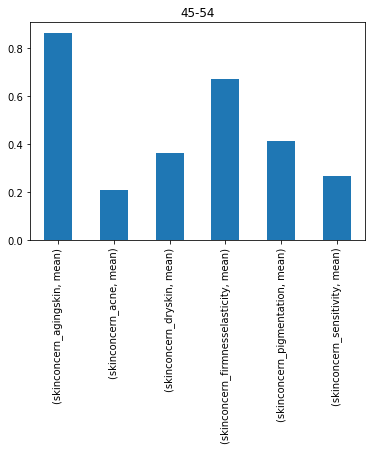

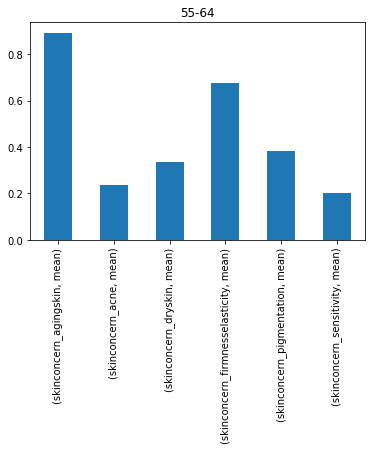

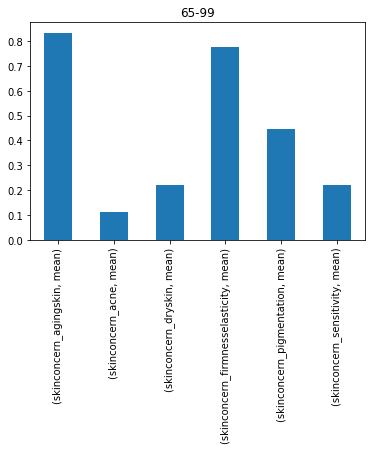

In [212]:
ages = ['18-24','25-34','35-44','45-54','55-64','65-99']
for ii in range(0,6):
    aggData.iloc[ii,11:17].plot(subplots = True,kind = 'bar')
    plt.title(ages[ii])
    plt.show()

18-24: Acne, dry skin, pigmenation, and sensitivty are all concerns here (in descending order)

25-34: Everything seems to be a concern here with acne being the highest and firmness elascity being the lowest

35-44: Starting from 35 aging skin is the biggest concern. In 35-44 everything is high enough that I think the group is concerned with sensitivty being the lowest.

45-54: This group seems to be mostly concerned about aging skin and firmness elascity, but the other categories are still returning high numbers!

55-64: This group is almost identical to the 45-54 group when it comes to concerns.

65-99: This group follows the same distribution as the 45-54 and 55-64 groups but with even more emphasis on firmness elascity, but aging skin is still the biggest concern.

# Part 5: Skin concerns by ethnicity

In [155]:
aggDataEth = cdata.groupby('ethnicity')
aggDataEth = aggDataEth.agg(['sum','mean'])
aggDataEth.iloc[:,22:34]

skinconcern_agingskin           skinconcern_acne            \
                                  sum      mean              sum      mean   
ethnicity                                                                    
africanamerican                 230.0  0.269321            624.0  0.730679   
asian                           436.0  0.439074            564.0  0.567976   
caucasian                      3529.0  0.586993           3235.0  0.538090   
hispanic                        624.0  0.469526            786.0  0.591422   
nativeamerican                   67.0  0.372222            121.0  0.672222   
pacific                          76.0  0.424581            104.0  0.581006   

                skinconcern_dryskin           skinconcern_firmnesselasticity  \
                                sum      mean                            sum   
ethnicity                                                                      
africanamerican               381.0  0.446136                          155.0   
asian                         438.0  0.441088                          309.0   
caucasian                    2454.0  0.408184                         2360.0   
hispanic                      588.0  0.442438                          505.0   
nativeamerican                 70.0  0.388889                           44.0   
pacific                        79.0  0.441341                           61.0   

                          skinconcern_pigmentation            \
                     mean                      sum      mean   
ethnicity                                                      
africanamerican  0.181499                    567.0  0.663934   
asian            0.311178                    597.0  0.601208   
caucasian        0.392548                   2305.0  0.383400   
hispanic         0.379985                    678.0  0.510158   
nativeamerican   0.244444                     81.0  0.450000   
pacific          0.340782                     91.0  0.508380   

                skinconcern_sensitivity            
                                    sum      mean  
ethnicity                                          
africanamerican                   321.0  0.375878  
asian                             321.0  0.323263  
caucasian                        2290.0  0.380905  
hispanic                          444.0  0.334086  
nativeamerican                     78.0  0.433333  
pacific                            74.0  0.413408

In [214]:
aggDataEth = cdata.groupby('ethnicity')
aggDataEth = aggDataEth.agg(['mean'])

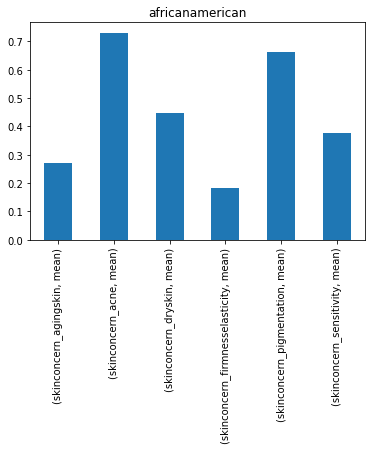

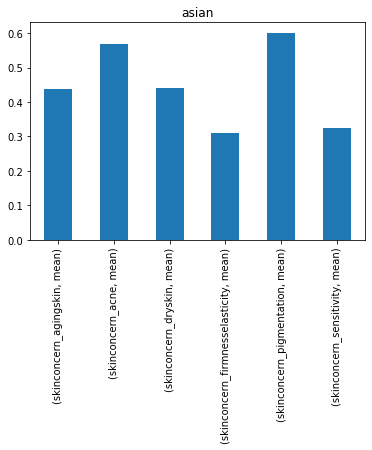

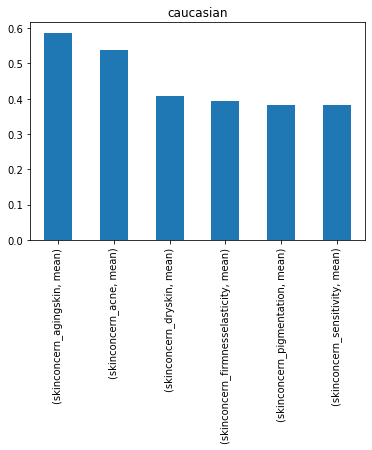

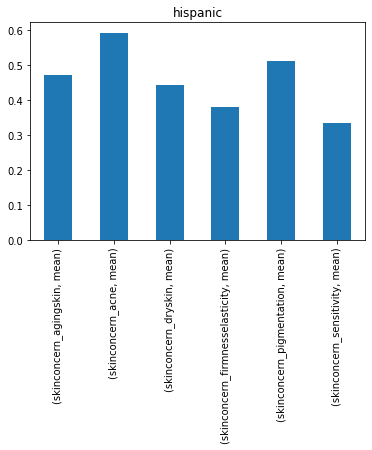

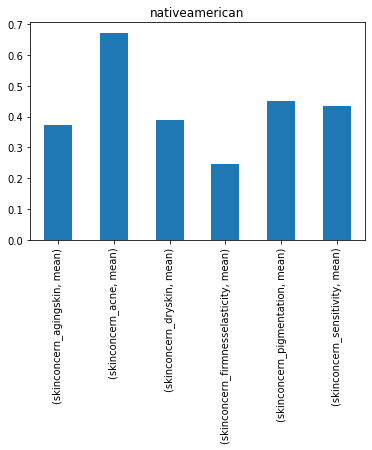

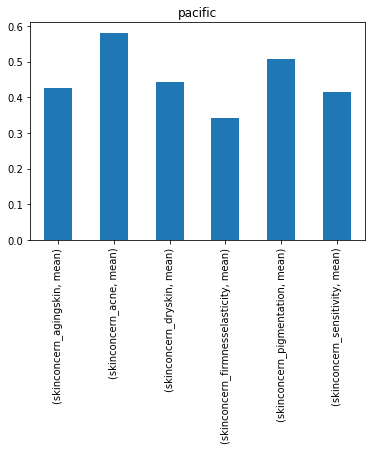

In [206]:
eths = ['africanamerican','asian','caucasian','hispanic','nativeamerican','pacific']
for ii in range(0,6):
    aggDataEth.iloc[ii,11:17].plot(subplots = True,kind = 'bar')
    plt.title(eths[ii])
    plt.show()

Africanamerican: Acne and pigmentaiton are the biggest concerns. African Americans care about Pigmentation the most out of all the ethnicites in this dataset. I can't say exactly why without some major assumptions since I'm white, but there is certainly something interesting going on here.

Asian: Pigmentation is the greatest concern here. I'd imagine that the reason why Asians are concerned about pigmentation is the same or similar to African Americans. Acne is the 2nd highest here.

Caucasian: Aging skin is the greatest concern followed by acne.

Hispanic: Acne and pigmentation here again.

Nativeamerican: Acne is by far the greatest concern here. However, the total data points for this ethnicity is relatively low so there is a high vulneravility of noise

Pacific: Everything is about the same here with acne being the highest, again.

# Part 6: Conclusions, and extra thoughts

Overall the dataset returns what's to be expected. I think there could be some interesting analysis to do on subsets of the data, for example cut out the acne focused data points and see what's left. People's skin concerns not correlating to many of the goals was also interesting and a deep dive into what's really going on there could produce a psychological view on how we perceive our skin problems.

As a side note it could be fun to build an ML algorithm to predict skin concern / goal or product based on skin type, skin after wash, t zone oily, and clogged pores. Could even throw in age/gender/eth into the algo.

As a quick extra I'm curious about who are the vegans in the dataset so this is a quick look at the age, gender, ethnicity distribution of vegans

In [217]:
vdata = cdata.loc[cdata['vegan']=='veganyes']

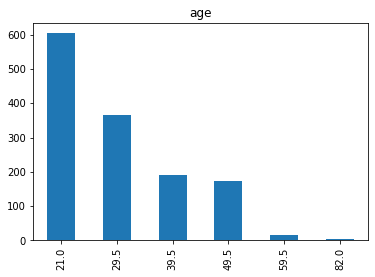

In [224]:
vdata.age.value_counts().plot(subplots = True, kind = 'bar')
plt.show()

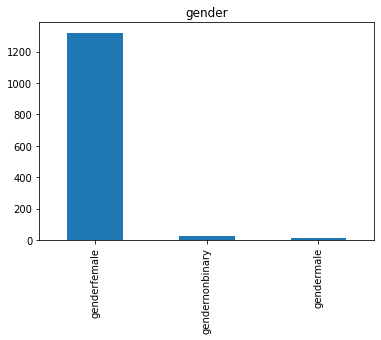

In [225]:
vdata.gender.value_counts().plot(subplots = True, kind = 'bar')
plt.show()

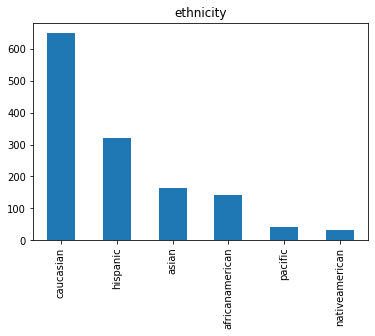

In [226]:
vdata.ethnicity.value_counts().plot(subplots = True, kind = 'bar')
plt.show()

All of these look almost idential to the full dataset except for ethnicity, which is kind of interesting.